In [96]:
import nltk


In [97]:
#nltk.download_shell()

In [98]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [99]:
messages[0]


'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [100]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [101]:
import pandas as pd

In [102]:
df = pd.read_csv("smsspamcollection/SMSSpamCollection",sep = '\t',names = ['label','message'])

In [103]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
df['length'] = df['message'].apply(len)

In [105]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [106]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

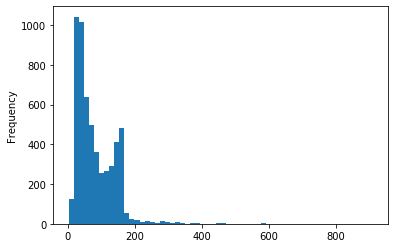

In [107]:
df['length'].plot.hist(bins=60)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1A086C198>,
      dtype=object)

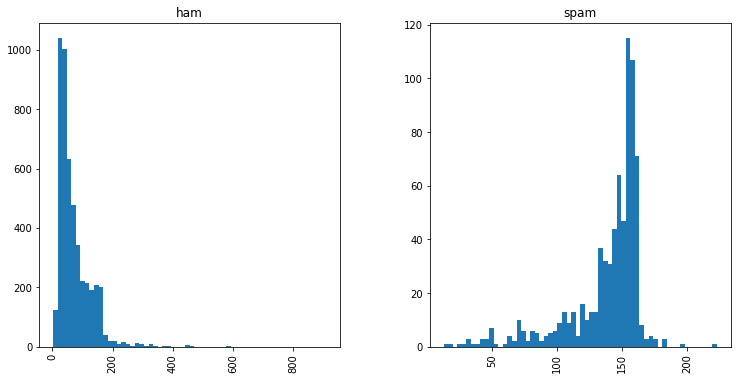

In [108]:
df.hist(column='length',by ='label',bins=60,figsize= (12,6))

In [109]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [110]:
example_msg = df['message'][0]

In [111]:
example_msg

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [112]:
import string

In [113]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [114]:
nopunc = [x for x in example_msg if x not in string.punctuation]

In [115]:
nopunc = ''.join(nopunc)

In [116]:
nopunc

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [117]:
from nltk.corpus import stopwords

In [118]:
clean_msg = [x for x in nopunc.split() if x not in stopwords.words('english') ]

In [119]:
clean_msg

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [120]:
def test_process(msg):
    nopunc = [x for x in msg if x not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_msg = [x for x in nopunc.split() if x not in stopwords.words('english') ]
    return clean_msg
    
    

In [121]:
clean_msg2 = test_process(df['message'][3])

In [122]:
clean_msg2

['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']

In [123]:
from sklearn.feature_extraction.text import CountVectorizer

In [124]:
bow_transformer = CountVectorizer(analyzer=test_process).fit(df['message'])

In [125]:
newmsg = df['message'][3]

In [126]:
bow4 = bow_transformer.transform([newmsg])

In [127]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [128]:
bow_transformer.get_feature_names()[9746]

'say'

In [129]:
bow_transformed_msg = bow_transformer.transform(df['message'])

In [130]:
from sklearn.feature_extraction.text import TfidfTransformer

In [131]:
tfidf_transformer = TfidfTransformer().fit(bow_transformed_msg)

In [132]:
msg_tfidf = tfidf_transformer.transform(bow_transformed_msg)

In [133]:
tfidf4 = tfidf_transformer.transform(bow4)

In [134]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [150]:
from sklearn.naive_bayes import MultinomialNB

In [151]:
spam_detection_model = MultinomialNB().fit(msg_tfidf,df['label'])

In [137]:
MultinomialNB.predict(tfidf4)[0]

'ham'

In [138]:
from sklearn.model_selection import train_test_split

In [156]:
train_message,test_message,train_label,test_label = train_test_split(df['message'],df['label'],test_size =0.2)

In [157]:
print(len(train_message),len(test_message))

4457 1115


In [158]:
from sklearn import pipeline

In [159]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=test_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [160]:
pipeline.fit(train_message,train_label)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function test_process at 0x000001E19E4C4048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [162]:
pred = pipeline.predict(test_message)

In [163]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(test_label,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       972
        spam       1.00      0.74      0.85       143

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

